<a href="https://colab.research.google.com/github/saerarawas/AAI_635O_B11_202520-Recommender-System/blob/main/Week2/Practical_Exercise_Building_a_Content_Based_Recommender_System_Using_Text_Data_Model_Answer_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install "numpy<2.0.0" --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install --upgrade pip # Upgrade pip to the latest version
!pip uninstall pandas -y # Uninstall pandas
!pip install pandas # Reinstall pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 60.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [4]:
!pip install numpy
!pip install pandas

In [5]:
!pip install --upgrade pip  # Upgrade pip to the latest version
!pip uninstall numpy pandas -y  # Uninstall both numpy and pandas
!pip install numpy==1.25.2  # Install numpy first
!pip install pandas  # Reinstall pandas

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 98.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.14.4 requires pandas!=2.1.0,>=1.4, which is not installed.
pymc 5.21.2 requires pandas>=0.24.0, which is not installed.
prophet 1.1.6 requires pandas>=1.0.4, which is not installed.
dopamine-rl 4.1.2 requires pandas>=0.24.2, which is not installed.
yfinance 0.2.55 requires pandas>=1.3.0, which is not installed.
geemap 0.35.3 requires pandas, which is not installed.
db-dtypes 1.4.2 requires pandas>=0.24.2, which is not installed.
arviz 0.21.0 requires pandas>=1.5.0, which is not installed.
datascience 0.17.6 r

  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
^C


In [1]:
#Importing the libraries

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, manhattan_distances, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from gensim import models
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from gensim.models import FastText as ft
from IPython.display import Image
import os
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Download GloVe
#!wget https://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip
#
# ------------------- 1. Load Pretrained Word Embeddings -------------------
# Load GloVe embeddings
import pandas as pd
print("Loading GloVe Model...")
glove_df = pd.read_csv("/content/glove.6B.300d.txt", sep=" ",
                       quoting=3, header=None, index_col=0)
glove_model = {key: value.values for key, value in glove_df.T.items()}

# Download the pre-trained model
word2vecModel = api.load("word2vec-google-news-300")

Loading GloVe Model...
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=300):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


In [5]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=100):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


In [6]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=50):
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector


In [10]:
# Load the dataset
df = pd.read_csv("/content/Rec_sys_content.csv", quotechar='"', escapechar="\\")

# Extract the 3rd column (product description)
product_descriptions = df.iloc[:, 2].dropna().astype(str).tolist()

# Print a few descriptions to verify
print(product_descriptions[:5])  # Print the first 5 descriptions


['New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ', 'Rounded rectangular cat-eye reading glasses. These frames feature a deep burgundy color on the face of the frame with crystal interior, as well as crystal temple detail and yellow, turqoise and black marbled colors on the inside of the temple arms. The standard hinges provide durability and the TR-90 con struction allows for some flex making these glasses very sturdy and perfect for every day use!| Always custom made to your individual order specifications in our FDA Listed Lab with the remarkable Optic

In [11]:
def clean_text(text):
    # Remove the dollar sign and any other special characters if necessary
    text = re.sub(r'\$', '', text)  # Remove dollar signs
    return text

product_descriptions = [clean_text(description) for description in product_descriptions]

In [13]:
# ------------------- Generate Sentence Embeddings -------------------
def get_sentence_vector(sentence, model, embedding_size=300): # Changed embedding_size to 300
    """Get sentence embedding by averaging word vectors."""
    words = nltk.word_tokenize(sentence.lower())
    sentence_vector = np.zeros((embedding_size,))
    count = 0

    for word in words:
        if word in model:
            sentence_vector += model[word]
            count += 1

    return sentence_vector / count if count > 0 else sentence_vector

In [14]:
# ------------------- Compute Embeddings -------------------
word2vec_embeddings = np.array([get_sentence_vector(desc, word2vecModel) for desc in product_descriptions])
glove_embeddings = np.array([get_sentence_vector(desc, glove_model) for desc in product_descriptions])

In [27]:
# Check which embeddings have NaN values
for method, embeddings in embeddings_dict.items():
    print(f"NaN values in {method}:", np.isnan(embeddings).any())

NaN values in Word2Vec: False
NaN values in GloVe: False


In [28]:
def fix_nan_embeddings(embeddings, strategy="remove"):
    """Handle NaN values in embeddings.
    Args:
        embeddings: Input embedding matrix.
        strategy: "remove" (drop NaN rows), "zero" (replace with 0), or "mean" (replace with column mean).
    Returns:
        Cleaned embeddings.
    """
    if not np.isnan(embeddings).any():
        return embeddings  # No NaNs found

    if strategy == "remove":
        return embeddings[~np.isnan(embeddings).any(axis=1)]
    elif strategy == "zero":
        embeddings[np.isnan(embeddings)] = 0
        return embeddings
    elif strategy == "mean":
        col_mean = np.nanmean(embeddings, axis=0)
        nan_indices = np.where(np.isnan(embeddings))
        embeddings[nan_indices] = np.take(col_mean, nan_indices[1])
        return embeddings
    else:
        raise ValueError("Invalid strategy. Use 'remove', 'zero', or 'mean'.")


📝 Running recommendations using Word2Vec embeddings:

🔹 Top 10 Recommendations for: 'New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ' using Word2Vec
   ✅ Hybrid Case Information: Brand new hard plastic case combined with soft rubber gel silicone skin cover. Hybrid case is a molded perfect-fit to your phone. Double the protection both front and back hard cover. Protects your phone against any scratch, bump, finger marks, and dirt. High quality silicone that is resistant to shock and has a great grip. Custom cutout design, giving you total access to all fu

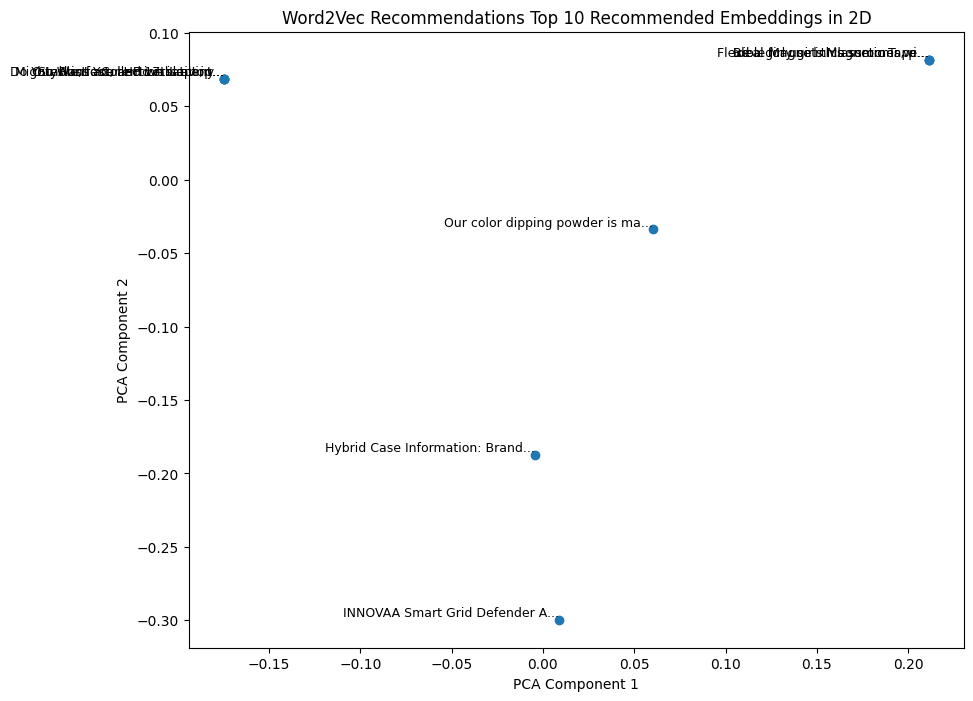


📝 Running recommendations using GloVe embeddings:

🔹 Top 10 Recommendations for: 'New unique design, great gift.High quality plastic material.Clips over the back of the device to protect the back &amp; sides from bumps and scratches.Printed using a process called sublimation, high quality image which will last for years!| New unique design, great gift. High quality plastic material. Clips over the back of the device to protect the back &amp; sides from bumps and scratches. Printed using a process called sublimation, high quality image which will last for years! ' using GloVe
   ✅ Huetron USB 2.0 cable features a standard Type-A USB connector on one end and a standard Type-B connector on the other that is built for connecting and disconnecting over and over again without signal loss. It helps you maximize performance for your devices, such as external hard drives, printers, digital-photography devices, and more. For devices with an older USB version, this cable is backward compatible s

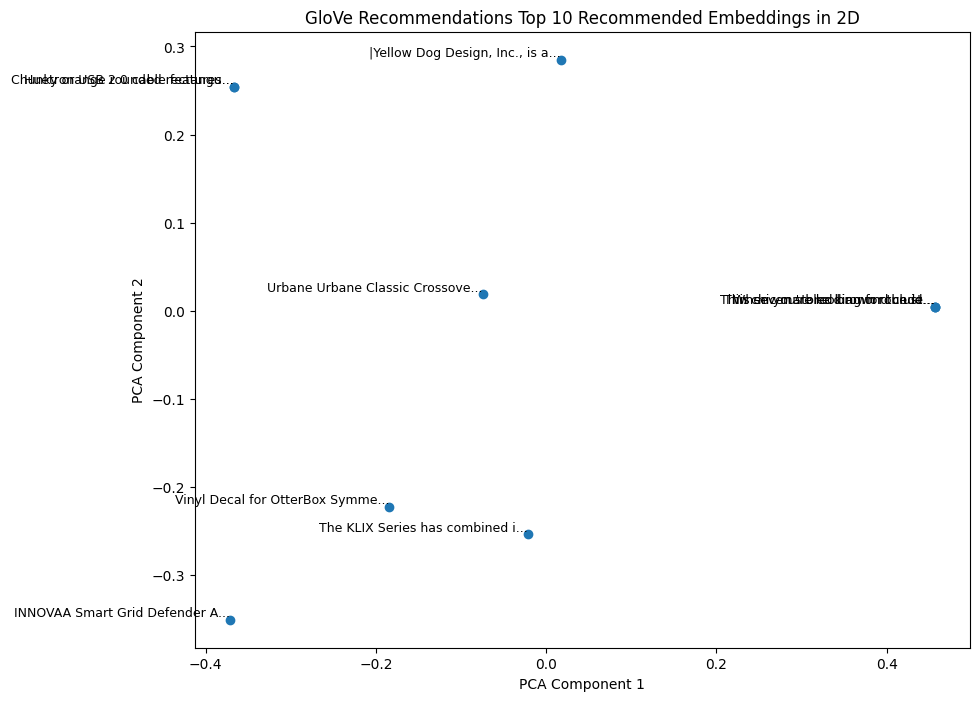

In [29]:
# ------------------- Compute Similarity Scores -------------------
def get_most_similar(query_index, embeddings, descriptions, method="Embedding Model", top_n=10):
    """Compute the most similar products based on cosine similarity."""
    similarities = cosine_similarity([embeddings[query_index]], embeddings)[0]
    sorted_indices = np.argsort(similarities)[::-1][1:]  # Exclude itself

    # Set to track unique descriptions
    unique_descriptions = set()

    # Select top_n most similar products
    top_indices = []
    top_similarities = []
    for idx in sorted_indices:
        if descriptions[idx] not in unique_descriptions:
            unique_descriptions.add(descriptions[idx])
            top_indices.append(idx)
            top_similarities.append(similarities[idx])
        if len(top_indices) == top_n:
            break

    print(f"\n🔹 Top {top_n} Recommendations for: '{descriptions[query_index]}' using {method}")
    for idx, similarity in zip(top_indices, top_similarities):
        print(f"   ✅ {descriptions[idx]} (Similarity: {similarity:.2f})")

    # Return the top_n recommendations' embeddings and descriptions
    top_embeddings = embeddings[top_indices]
    top_descriptions = [descriptions[idx] for idx in top_indices]
    return top_embeddings, top_descriptions


# ------------------- Visualizing Top 10 Recommended Embeddings -------------------
def plot_embeddings(embeddings, descriptions, title, max_label_length=30):
    """Visualize the embeddings of the top recommended products."""
    # Truncate descriptions to avoid long labels
    truncated_labels = [desc[:max_label_length] + '...' if len(desc) > max_label_length else desc for desc in descriptions]

    # Apply PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker='o')

    # Annotate
    for i, label in enumerate(truncated_labels):
        plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, ha='right', va='bottom')

    plt.title(f"{title} Top 10 Recommended Embeddings in 2D")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

def process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10):
    """Process and plot the top recommendations for multiple models."""
    for method, embeddings in embeddings_dict.items():
        # Verify no NaN values remain
        assert not np.isnan(embeddings).any(), f"{method} still contains NaN values"

        print(f"\n📝 Running recommendations using {method} embeddings:")
        top_embeddings, top_descriptions = get_most_similar(
            query_product, embeddings, product_descriptions, method, top_n
        )
        plot_embeddings(top_embeddings, top_descriptions, f"{method} Recommendations")

# ------------------- Running for Multiple Models -------------------
#def process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10):
#    """Process and plot the top recommendations for multiple models (Word2Vec, GloVe)."""
#    for method, embeddings in embeddings_dict.items():
#        print(f"\n📝 Running recommendations using {method} embeddings:")
#        top_embeddings, top_descriptions = get_most_similar(query_product, embeddings, product_descriptions, method, top_n)
#        plot_embeddings(top_embeddings, top_descriptions, f"{method} Recommendations", max_label_length=50)


embeddings_dict = {
    "Word2Vec": word2vec_embeddings,
    "GloVe": glove_embeddings
}

# Choose a product to base recommendations on
query_product = 0  # Choose first product

# Process and visualize for all models
process_and_plot(query_product, product_descriptions, embeddings_dict, top_n=10)